<a href="https://colab.research.google.com/github/Gunehee/Seattle_Airbnb/blob/main/Seattle_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Airbnb Proportion

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("swsw1717/seatle-airbnb-open-data-sql-project")

print("Path to dataset files:", path)

100%|██████████| 57.3M/57.3M [00:01<00:00, 56.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/swsw1717/seatle-airbnb-open-data-sql-project/versions/4


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calendar_df = pd.read_csv('/root/.cache/kagglehub/datasets/swsw1717/seatle-airbnb-open-data-sql-project/versions/4/calendar.csv')

calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2024-06-24,f,$90.00,NaN,30.0,1125.0
1,6606,2024-06-25,f,$90.00,NaN,30.0,1125.0
2,6606,2024-06-26,f,$90.00,NaN,30.0,1125.0
3,6606,2024-06-27,f,$90.00,NaN,30.0,1125.0
4,6606,2024-06-28,f,$90.00,NaN,30.0,1125.0


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350878 entries, 0 to 2350877
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 125.6+ MB


In [ ]:
# Filter for dates up to 2024-07-31
calendar_df = calendar_df[calendar_df['date'] <= '2024-07-31']
print("Filtered Calendar Dataset Shape:", calendar_df.shape)

Filtered Calendar Dataset Shape: (242175, 7)


In [ ]:
# Find earliest and latest dates in calendar
eariest_date = calendar_df['date'].min()
latest_date = calendar_df['date'].max()
print("Earliest date:", eariest_date, "Latest date:", latest_date)

Earliest date: 2024-06-24 Latest date: 2024-07-31


In [ ]:
# descriptive stat for each data
calendar_df.describe()

,listing_id,adjusted_price,minimum_nights,maximum_nights
count,2.421750e+05,0.0,242174.000000,2.421740e+05
mean,4.776150e+17,NaN,11.527802,3.376996e+05
std,4.634197e+17,NaN,22.695749,2.689828e+07
min,6.606000e+03,NaN,1.000000,1.000000e+00
25%,3.406989e+07,NaN,2.000000,3.650000e+02
50%,6.138502e+17,NaN,2.000000,1.125000e+03
75%,9.315239e+17,NaN,30.000000,1.125000e+03
max,1.185488e+18,NaN,365.000000,2.147484e+09


In [ ]:
reviews_df = pd.read_csv('/root/.cache/kagglehub/datasets/swsw1717/seatle-airbnb-open-data-sql-project/versions/4/reviews.csv')

reviews_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481350 entries, 0 to 481349
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     481350 non-null  int64 
 1   id             481350 non-null  int64 
 2   date           481350 non-null  object
 3   reviewer_id    481350 non-null  int64 
 4   reviewer_name  481350 non-null  object
 5   comments       481277 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.0+ MB


In [ ]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,4.813500e+05,4.813500e+05,4.813500e+05
mean,1.328656e+17,4.980160e+17,1.469986e+08
std,2.985624e+17,4.429813e+17,1.461351e+08
min,6.606000e+03,5.664000e+03,1.500000e+01
25%,1.256632e+07,4.648608e+08,3.073950e+07
50%,2.537119e+07,5.862915e+17,9.372833e+07
75%,5.057412e+07,9.218365e+17,2.191771e+08
max,1.178446e+18,1.186454e+18,5.845648e+08


In [ ]:
listings_df = pd.read_csv('/root/.cache/kagglehub/datasets/swsw1717/seatle-airbnb-open-data-sql-project/versions/4/listings.csv')
listings_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.0,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125.0,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622


In [ ]:
listings_df.rename(columns={'neighbourhood_group': 'neighborhood_group', 'neighbourhood': 'neighborhood'}, inplace=True)
listings_df.head(5)

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.0,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125.0,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622


In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6442 non-null   int64  
 1   name                            6442 non-null   object 
 2   host_id                         6442 non-null   int64  
 3   host_name                       6442 non-null   object 
 4   neighborhood_group              6442 non-null   object 
 5   neighborhood                    6442 non-null   object 
 6   latitude                        6442 non-null   float64
 7   longitude                       6442 non-null   float64
 8   room_type                       6442 non-null   object 
 9   price                           6011 non-null   float64
 10  minimum_nights                  6442 non-null   int64  
 11  number_of_reviews               6442 non-null   int64  
 12  last_review                     56

In [ ]:
listings_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.442000e+03,6.442000e+03,6442.000000,6442.000000,6011.000000,6442.000000,6442.000000,5601.000000,6442.000000,6442.000000,6442.000000
mean,4.778906e+17,1.561396e+08,47.626021,-122.334359,212.495092,11.127134,74.720584,2.264496,29.113319,183.257529,18.679913
std,4.635029e+17,1.730557e+08,0.048794,0.033425,222.397718,18.466967,114.938072,2.572886,77.237314,116.273916,22.792994
min,6.606000e+03,4.193000e+03,47.495874,-122.419040,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.418163e+07,1.987743e+07,47.601655,-122.357278,116.000000,2.000000,4.000000,0.670000,1.000000,81.000000,1.000000
50%,6.144249e+17,8.033375e+07,47.623220,-122.332260,167.000000,2.000000,29.000000,1.780000,2.000000,178.000000,10.000000
75%,9.319134e+17,2.552755e+08,47.663776,-122.310931,250.000000,30.000000,97.000000,3.320000,11.000000,295.000000,30.000000
max,1.185488e+18,5.848754e+08,47.734087,-122.240870,9000.000000,365.000000,1404.000000,101.200000,340.000000,365.000000,280.000000


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(listings_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="price",
                        hover_data=["price", "room_type"],
                        color="room_type",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

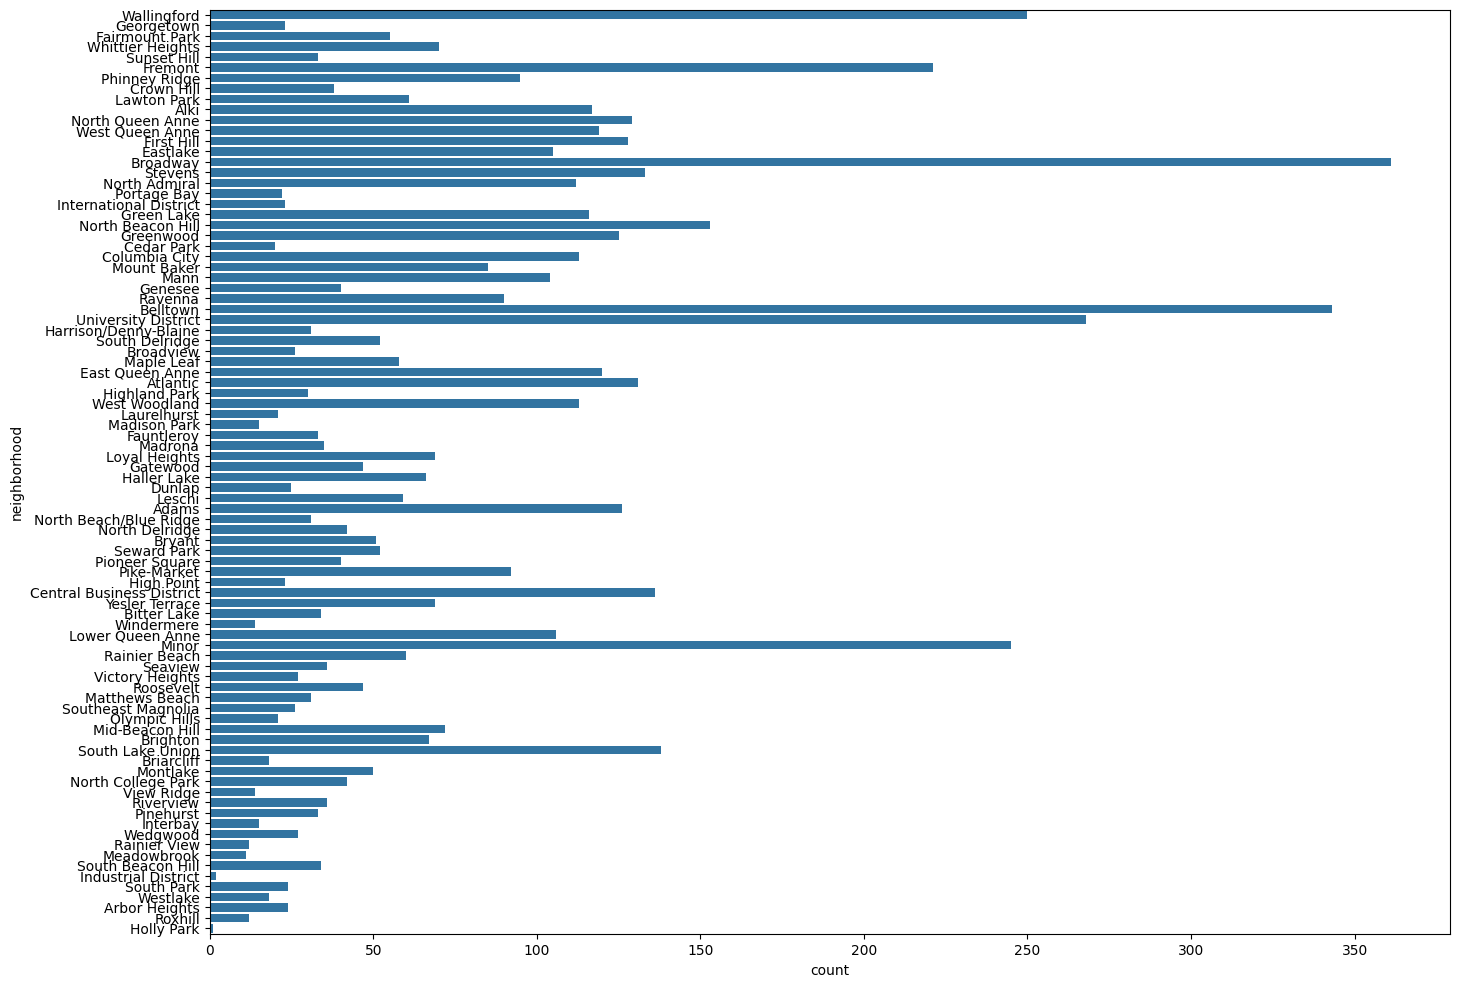

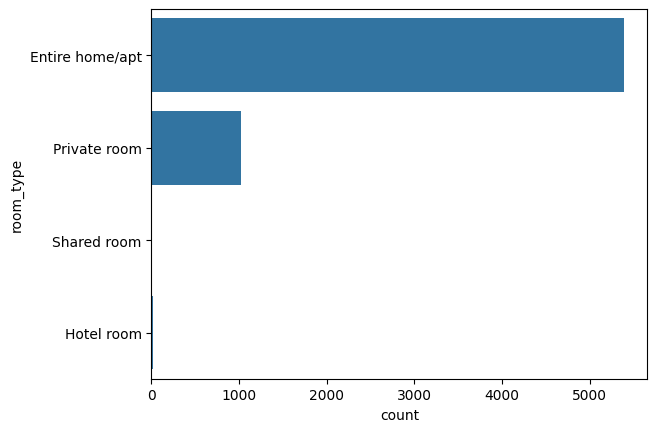

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['neighborhood','room_type']
plt.figure(figsize=(16,12))
for col in cols:
    sns.countplot(y=col,data=listings_df)
    plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, classification_report
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
com = listings_df.columns.intersection(reviews_df.columns)
com

Index(['id'], dtype='object')

In [ ]:
join1 = listings_df.join(reviews_df, on='id', how='left', lsuffix='_listing', rsuffix='_review')
join2 = join1.join(calendar_df, on='price', how='left', lsuffix='_join', rsuffix='_calendar')
df = join2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           6011 non-null   float64
 1   id                              6442 non-null   int64  
 2   id_listing                      6442 non-null   int64  
 3   name                            6442 non-null   object 
 4   host_id                         6442 non-null   int64  
 5   host_name                       6442 non-null   object 
 6   neighborhood_group              6442 non-null   object 
 7   neighborhood                    6442 non-null   object 
 8   latitude                        6442 non-null   float64
 9   longitude                       6442 non-null   float64
 10  room_type                       6442 non-null   object 
 11  price_join                      6011 non-null   float64
 12  minimum_nights_join             64

In [ ]:
df.select_dtypes(include='object').columns

Index(['name', 'host_name', 'neighborhood_group', 'neighborhood', 'room_type',
       'last_review', 'license', 'date_join', 'reviewer_name', 'comments',
       'date_calendar', 'available', 'price_calendar'],
      dtype='object')

In [ ]:
le = LabelEncoder()

object_to_int = ['name', 'host_name', 'neighborhood_group', 'neighborhood',
       'room_type', 'last_review', 'license', 'date_join', 'reviewer_name',
       'comments', 'date_calendar', 'available', 'price_calendar']

for obj_int in object_to_int:
    df[obj_int]  = le.fit_transform(df[obj_int])


float_to_int = ['price', 'latitude', 'longitude', 'price_join', 'reviews_per_month',
                      'listing_id_join', 'id_review', 'reviewer_id', 'listing_id_calendar',
                      'adjusted_price', 'minimum_nights_calendar', 'maximum_nights']

for fl_int in float_to_int:
    df[fl_int] = le.fit_transform(df[fl_int])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           6442 non-null   int64
 1   id                              6442 non-null   int64
 2   id_listing                      6442 non-null   int64
 3   name                            6442 non-null   int64
 4   host_id                         6442 non-null   int64
 5   host_name                       6442 non-null   int64
 6   neighborhood_group              6442 non-null   int64
 7   neighborhood                    6442 non-null   int64
 8   latitude                        6442 non-null   int64
 9   longitude                       6442 non-null   int64
 10  room_type                       6442 non-null   int64
 11  price_join                      6442 non-null   int64
 12  minimum_nights_join             6442 non-null   int64
 13  num

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6442 non-null   int64  
 1   name                            6442 non-null   object 
 2   host_id                         6442 non-null   int64  
 3   host_name                       6442 non-null   object 
 4   neighborhood_group              6442 non-null   object 
 5   neighborhood                    6442 non-null   object 
 6   latitude                        6442 non-null   float64
 7   longitude                       6442 non-null   float64
 8   room_type                       6442 non-null   object 
 9   price                           6011 non-null   float64
 10  minimum_nights                  6442 non-null   int64  
 11  number_of_reviews               6442 non-null   int64  
 12  last_review                     56

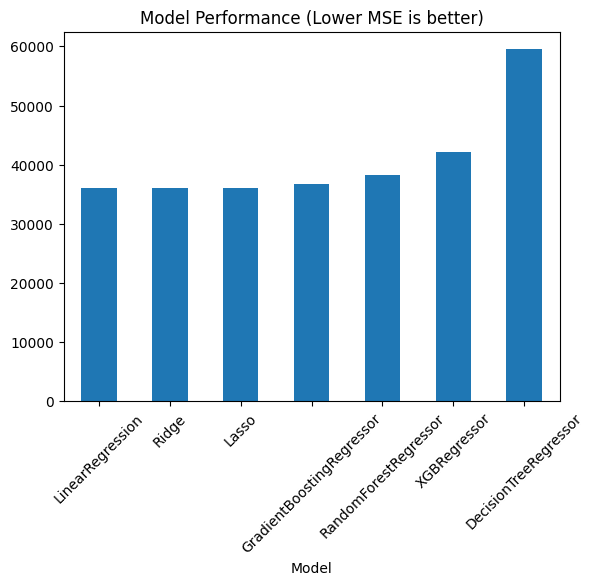

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Clustering neighborhoods by price and availability
def cluster_neighborhoods(df, n_clusters=5):
    # Create a copy to avoid modifying the original DataFrame during clustering
    df_cluster = df[['price', 'availability_365']].copy()
    # Drop NaNs only for clustering
    df_cluster.dropna(inplace=True)
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(df_cluster) # Added n_init for KMeans
    # Assign cluster labels to the clustered data
    df_cluster['cluster'] = kmeans.labels_
    # Merge the cluster labels back to the original DataFrame using the index
    # This ensures that the cluster labels are aligned with the correct rows
    df = df.merge(df_cluster[['cluster']], left_index=True, right_index=True, how='left')
    return df, kmeans

# Make sure listings_df is the correct DataFrame before calling the function
# Based on the previous code, listings_df seems to be the intended DataFrame for clustering
# Ensure 'price' and 'availability_365' columns exist in listings_df
if 'price' in listings_df.columns and 'availability_365' in listings_df.columns:
    listings_df, kmeans_model = cluster_neighborhoods(listings_df)
    # Print info to verify the 'cluster' column is added
    print(listings_df.info())
else:
    print("Error: 'price' or 'availability_365' columns not found in listings_df.")


# Model Training and Evaluation
# Ensure that rows with NaN 'cluster' values (due to dropna during clustering) are handled
# One way is to drop these rows for model training or impute them.
# For simplicity, we'll drop rows with NaN in 'cluster' for the subsequent steps that rely on 'cluster'
listings_df_model = listings_df.dropna(subset=['cluster']).copy()

X = listings_df_model[['availability_365', 'minimum_nights', 'number_of_reviews']]
y = listings_df_model['price']

# Ensure X and y have the same number of rows and no NaNs before splitting and training
X = X.dropna()
y = y[X.index] # Keep only the corresponding y values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse})
    print(f"{name} MSE: {mse:.2f}")

results_df = pd.DataFrame(results).sort_values(by='MSE')
results_df.plot(kind='bar', x='Model', y='MSE', legend=False)
plt.xticks(rotation=45)
plt.title("Model Performance (Lower MSE is better)")
plt.show()

In [ ]:
# Data exploration
print(calendar_df.head(10))
print(listings_df.head(10))
print(reviews_df.head(10))

   listing_id        date available   price  adjusted_price  minimum_nights  \
0        6606  2024-06-24         f  $90.00             NaN            30.0   
1        6606  2024-06-25         f  $90.00             NaN            30.0   
2        6606  2024-06-26         f  $90.00             NaN            30.0   
3        6606  2024-06-27         f  $90.00             NaN            30.0   
4        6606  2024-06-28         f  $90.00             NaN            30.0   
5        6606  2024-06-29         f  $90.00             NaN            30.0   
6        6606  2024-06-30         f  $90.00             NaN            30.0   
7        6606  2024-07-01         f  $90.00             NaN            30.0   
8        6606  2024-07-02         f  $90.00             NaN            30.0   
9        6606  2024-07-03         f  $90.00             NaN            30.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0  
5         

In [ ]:
# Count records in each table
print("Total listings:", len(listings_df))
print("Total reviews:", len(reviews_df))
print("Total calendar entries:", len(calendar_df))

Total listings: 6442
Total reviews: 481350
Total calendar entries: 242175


#### Data Cleaning

In [ ]:
# Data cleaning
calendar_df['price'] = calendar_df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float) # Treat 'price' as a string first
print("Calendar prices cleaned")

# Identify duplicate listings
duplicate_listings = listings_df[listings_df.duplicated(subset='id', keep=False)]
print("Duplicate listings:")
print(duplicate_listings)

Calendar prices cleaned
Duplicate listings:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighborhood_group, neighborhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, cluster]
Index: []


In [ ]:
def clean_missing_values(df):
    missing_summary = df.isnull().sum().sort_values(ascending=False)
    print("Missing Values Summary:\n", missing_summary[missing_summary > 0])
    return df.dropna(axis=0, subset=missing_summary[missing_summary > 0].index[:5])

calendar_df = clean_missing_values(calendar_df)
listings_df = clean_missing_values(listings_df)
reviews_df = clean_missing_values(reviews_df)

Missing Values Summary:
 adjusted_price    242175
minimum_nights         1
maximum_nights         1
dtype: int64
Missing Values Summary:
 license              1130
last_review           841
reviews_per_month     841
cluster               431
price                 431
dtype: int64
Missing Values Summary:
 comments    73
dtype: int64


In [ ]:
# Function to remove duplicates
def remove_duplicates(df, key_column):
    before = df.shape[0]
    df = df.drop_duplicates(subset=[key_column])
    print(f"Removed {before - df.shape[0]} duplicates.")
    return df

In [ ]:
# Clean datasets
calendar_df = clean_missing_values(calendar_df)
listings_df = clean_missing_values(listings_df)
reviews_df = clean_missing_values(reviews_df)

calendar_df = remove_duplicates(calendar_df, 'listing_id')
listings_df = remove_duplicates(listings_df, 'id')
reviews_df = remove_duplicates(reviews_df, 'id')

Missing Values Summary:
 Series([], dtype: int64)
Missing Values Summary:
 Series([], dtype: int64)
Missing Values Summary:
 Series([], dtype: int64)
Removed 0 duplicates.
Removed 0 duplicates.
Removed 0 duplicates.


In [ ]:
# Convert date columns to datetime format
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Ensure no duplicates
def remove_duplicates(df, key_column):
    before = df.shape[0]
    df = df.drop_duplicates(subset=[key_column])
    after = df.shape[0]
    print(f"Removed {before - after} duplicates from {key_column}.")
    return df

calendar_df = remove_duplicates(calendar_df, 'listing_id')
listings_df = remove_duplicates(listings_df, 'id')
reviews_df = remove_duplicates(reviews_df, 'id')

Removed 0 duplicates from listing_id.
Removed 0 duplicates from id.
Removed 0 duplicates from id.


In [ ]:
# Identify listings with missing prices
missing_price_listings = listings_df[listings_df['price'] == 0]
print("Listings with missing prices:")
print(missing_price_listings)

Listings with missing prices:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighborhood_group, neighborhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, cluster]
Index: []


In [ ]:
# Update missing prices using calendar
def update_missing_prices(listings, calendar):
    price_map = calendar.groupby('listing_id')['price'].max()
    listings['price'] = listings.apply(lambda row: price_map.get(row['id'], row['price']) if row['price'] == 0 else row['price'], axis=1)
    return listings

listings_df = update_missing_prices(listings_df, calendar_df)

In [ ]:
# Verify no listings with zero price
print("Listings with zero price after update:")
print(listings_df[listings_df['price'] == 0])

Listings with zero price after update:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighborhood_group, neighborhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, cluster]
Index: []


In [ ]:
# Descriptive statistics and insights
neighborhood_group_stats = listings_df.groupby('neighborhood_group').agg(avg_price=('price', 'mean'),
                                                                         number_listings=('id', 'count'))
print("Neighborhood group statistics:")
print(neighborhood_group_stats)

most_expensive_neighborhoods = listings_df.groupby('neighborhood_group')['price'].max().sort_values(ascending=False).head(5)
print("Most expensive neighborhoods:")
print(most_expensive_neighborhoods)

least_expensive_neighborhoods = listings_df.groupby('neighborhood_group')['price'].min().sort_values().head(5)
print("Least expensive neighborhoods:")
print(least_expensive_neighborhoods)

Neighborhood group statistics:
                      avg_price  number_listings
neighborhood_group                              
Ballard              203.020000              300
Beacon Hill          205.980296              203
Capitol Hill         217.656934              411
Cascade              268.012048               83
Central Area         235.323913              460
Delridge             164.974194              155
Downtown             229.391844              564
Interbay             257.571429                7
Lake City            195.416667               84
Magnolia             239.654762               84
Northgate            161.369565              138
Other neighborhoods  206.829042              971
Queen Anne           277.410667              375
Rainier Valley       181.971731              283
Seward Park          185.277778               36
University District  155.011111              180
West Seattle         200.830239              377
Most expensive neighborhoods:
neighbor

In [ ]:
# Price outliers
avg_price = listings_df['price'].mean()
std_price = listings_df['price'].std()
price_outliers = listings_df[listings_df['price'] > avg_price + 3 * std_price]
print("Price outliers:")
print(price_outliers[['id', 'name', 'price']])

Price outliers:
                       id                                               name  \
206               3308979             Modern City Home+Views+Hot tub+Parking   
308               5680462  6 BdRm Custom Home/Best Location/Perfect 4 Gro...   
337               6248083    PH style Lux w/THE Seattle "Post Card" view too   
764              15407909                                   Queen Anne Oasis   
911              18378437    The RidgeView - 4BR w/ Roof-top Hot Tub & Views   
924              18635270           Beautiful Seattle Home in Quiet Magnolia   
934              18849203                  Huge Home a Block from Green Lake   
1074             21105396  Oasis w/ heated indoor pool, hot tub & lake views   
1078             21170317                                 Queen Anne Classic   
1196             23698647  Seattle Vacation Home: The Campus; 8 bedrooms ...   
1197             23699002  Seattle Vacation Home: The Arboretum - 7 bedro...   
1238             2439510

In [ ]:
# Room types generating the most revenue
listings_df['revenue'] = (365 - listings_df['availability_365']) * listings_df['price']
room_type_revenue = listings_df.groupby('room_type')['revenue'].sum().sort_values(ascending=False)
print("Room types generating the most revenue:")
print(room_type_revenue)

Room types generating the most revenue:
room_type
Entire home/apt    165739869.0
Private room        10924273.0
Shared room            74840.0
Hotel room             24203.0
Name: revenue, dtype: float64


In [ ]:
# Create a revenue estimate
def preprocess_calendar_data(df):
    df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Clean and convert price
    df['availability'] = df['available'].apply(lambda x: 1 if x == 't' else 0)
    df['estimated_revenue'] = df['price'] * df['availability']
    return df

calendar_df = preprocess_calendar_data(calendar_df)

In [ ]:
# Revenue by room type
revenue_by_room_type = listings_df.groupby('room_type')['price'].mean().sort_values()
print("Average Revenue by Room Type:\n", revenue_by_room_type)

# Price trends by month
def monthly_price_trends(df):
    df['month'] = df['date'].dt.month
    monthly_avg_price = df.groupby('month')['price'].mean()
    return monthly_avg_price

monthly_avg_price = monthly_price_trends(calendar_df)
print("Monthly Price Trends:\n", monthly_avg_price)

Average Revenue by Room Type:
 room_type
Shared room         84.500000
Private room       108.405199
Entire home/apt    230.430089
Hotel room         231.666667
Name: price, dtype: float64
Monthly Price Trends:
 Series([], Name: price, dtype: float64)


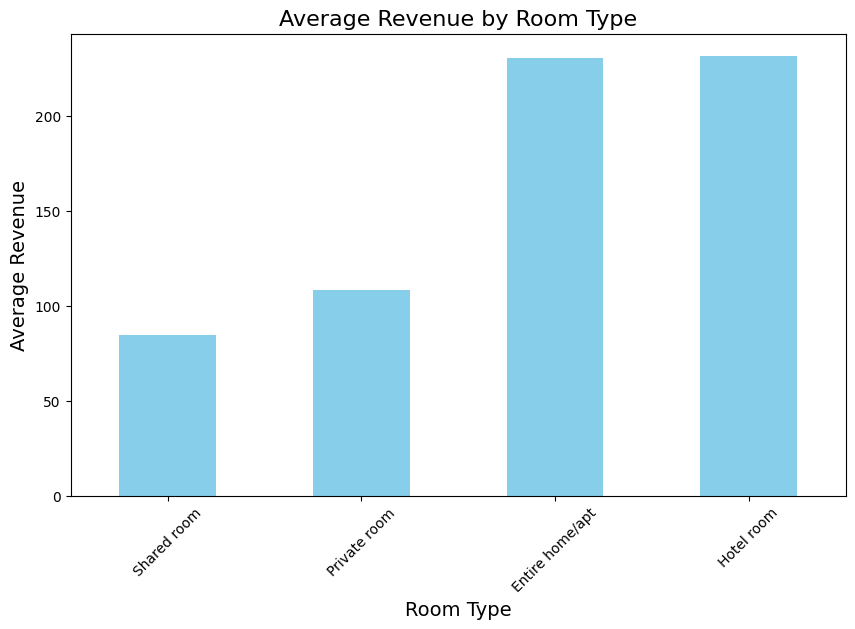

In [ ]:
# Visualize revenue by room type
plt.figure(figsize=(10, 6))
revenue_by_room_type.plot(kind='bar', color='skyblue')
plt.title("Average Revenue by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Average Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Interactive visualization with Plotly: Room type distribution
fig = px.box(listings_df, x='room_type', y='price', color='room_type', title='Price Distribution by Room Type',
             labels={'room_type': 'Room Type', 'price': 'Price'})
fig.show()

In [ ]:
# Temporal analysis
calendar_df['month'] = pd.to_datetime(calendar_df['date']).dt.month
busiest_months = calendar_df[calendar_df['available'] == 'f'].groupby('month').size().sort_values(ascending=False)
print("Busiest months for Airbnb bookings:")
print(busiest_months)

Busiest months for Airbnb bookings:
Series([], dtype: int64)


In [ ]:
# Top 10 hosts with most listings
top_hosts = listings_df.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).head(10)
print("Top 10 hosts with most listings:")
print(top_hosts)

Top 10 hosts with most listings:
host_id    host_name                
3074414    Melissa                      94
340706410  Vince                        90
398317720  Joanne                       65
212826084  Vacasa Western Washington    51
28420265   Sherry                       45
121688409  Evolve                       38
80333752   Ashley And Mike              35
54812088   Seattle Vacation Home        29
25110157   Eva And Sid                  29
104834083  Vacasa Western Washington    28
dtype: int64


In [ ]:
# Price distribution by room type
room_type_distribution = listings_df.groupby('room_type').agg(
    total_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    min_price=('price', 'min'),
    max_price=('price', 'max'),
    stddev_price=('price', 'std')
)
print("Price distribution by room type:")
print(room_type_distribution)

Price distribution by room type:
                 total_listings   avg_price  min_price  max_price  \
room_type                                                           
Entire home/apt            4048  230.430089       10.0     4000.0   
Hotel room                    3  231.666667      184.0      319.0   
Private room                654  108.405199       36.0      675.0   
Shared room                   6   84.500000       35.0      133.0   

                 stddev_price  
room_type                      
Entire home/apt    169.920563  
Hotel room          75.738585  
Private room        66.914766  
Shared room         38.088056  


In [ ]:
# Top neighborhoods with the highest average price for each room type
neighborhood_room_type_avg = listings_df.groupby(['neighborhood_group', 'room_type']).agg(avg_price=('price', 'mean')).reset_index()
ranked_neighborhoods = neighborhood_room_type_avg.sort_values(['room_type', 'avg_price'], ascending=[True, False]).groupby('room_type').head(3)
print("Top neighborhoods with the highest average price for each room type:")
print(ranked_neighborhoods)

Top neighborhoods with the highest average price for each room type:
     neighborhood_group        room_type   avg_price
7               Cascade  Entire home/apt  307.764706
27           Queen Anne  Entire home/apt  296.957704
9          Central Area  Entire home/apt  261.750663
14             Downtown       Hotel room  231.666667
15             Downtown     Private room  175.878049
34  University District     Private room  153.061224
5          Capitol Hill     Private room  142.000000
26  Other neighborhoods      Shared room  133.000000
6          Capitol Hill      Shared room  110.000000
16             Downtown      Shared room   66.000000


In [ ]:
# Price trend over time for each neighborhood
calendar_df['month_year'] = pd.to_datetime(calendar_df['date']).dt.to_period('M')
price_trend = calendar_df.merge(listings_df[['id', 'neighborhood_group']], left_on='listing_id', right_on='id')
price_trend = price_trend.groupby(['month_year', 'neighborhood_group'])['price'].mean().reset_index()
print("Price trend over time for each neighborhood:")
print(price_trend)

Price trend over time for each neighborhood:
Empty DataFrame
Columns: [month_year, neighborhood_group, price]
Index: []


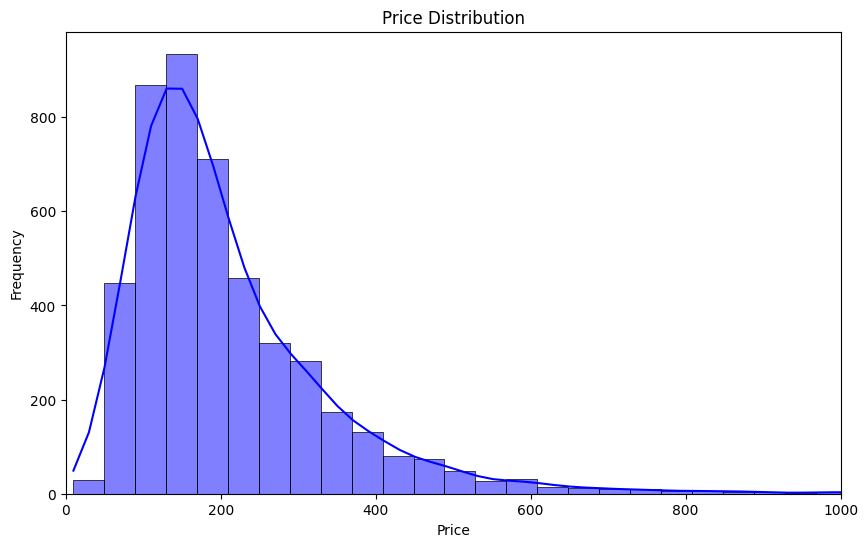

In [ ]:
# Analyze price distribution
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], bins=100, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.show()

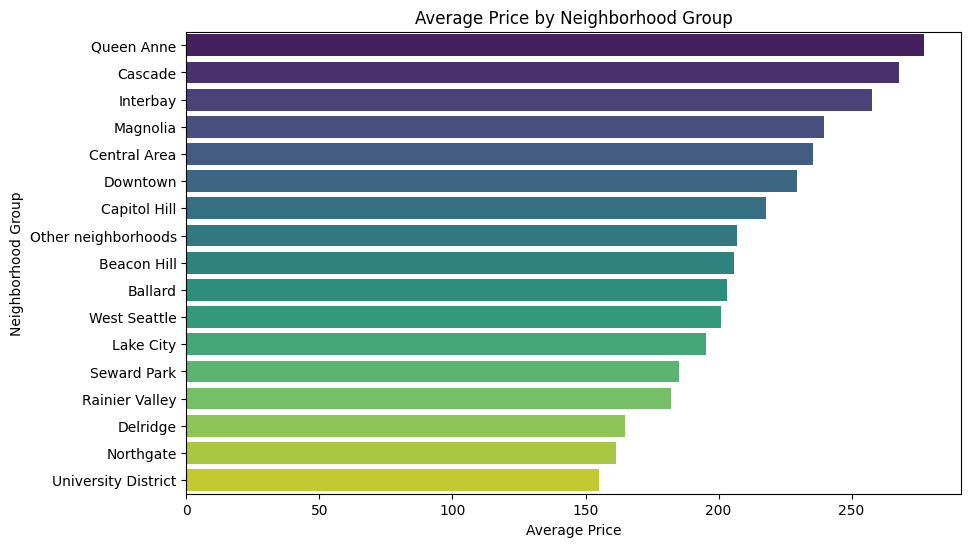

In [ ]:
# Neighborhood-level price analysis
neighborhood_avg_price = listings_df.groupby('neighborhood_group')['price'].mean().reset_index()
neighborhood_avg_price = neighborhood_avg_price.sort_values('price', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=neighborhood_avg_price, x='price', y='neighborhood_group', palette='viridis')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood Group')
plt.show()

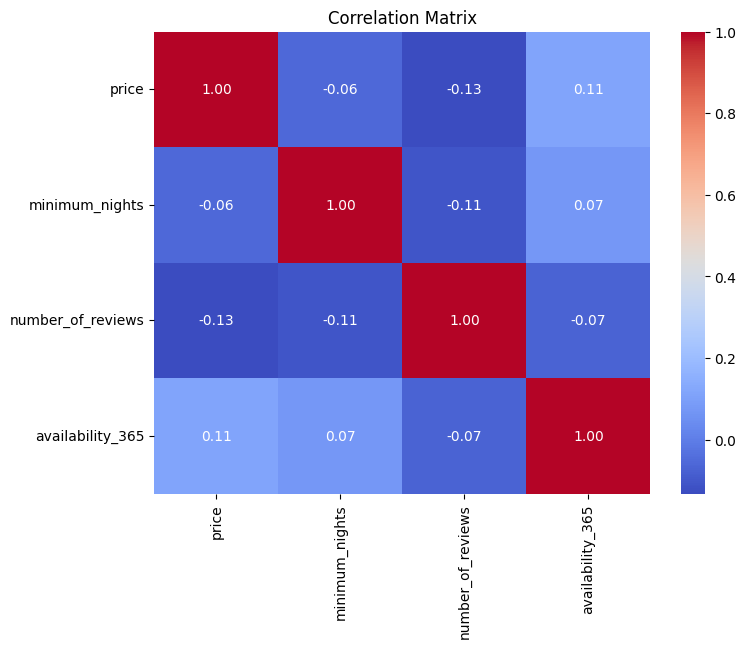

In [ ]:
# Correlation analysis
corr_matrix = listings_df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Clustering Analysis
# Clustering neighborhoods by price and availability
from sklearn.cluster import KMeans
def cluster_neighborhoods(df, n_clusters=5):
    df_cluster = df[['price', 'availability_365']].dropna()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_cluster)
    df['cluster'] = kmeans.labels_
    return df, kmeans

listings_df, kmeans_model = cluster_neighborhoods(listings_df)

# Visualize clusters
fig = px.scatter(listings_df, x='price', y='availability_365', color='cluster', title="Clustering of Listings by Price and Availability")
fig.show()

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 36728.01141833412
R^2 Score: 0.014317276728714412


In [ ]:
# Interactive map of listings
listings_map = listings_df[['latitude', 'longitude', 'price', 'room_type']]
fig = px.scatter_mapbox(listings_map, lat='latitude', lon='longitude', color='price', size='price',
                        hover_name='room_type', title='Listings on Map', zoom=10, mapbox_style='open-street-map')
fig.show()